In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name= fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font',family=font_name)

import matplotlib as mlp
mlp.rcParams['axes.unicode_minus']=False

from bs4 import BeautifulSoup
import requests

In [13]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

# pip install webdriver-manager
from webdriver_manager.chrome import ChromeDriverManager # 크롬 버전 알아서 맞춰줌
from selenium.webdriver.chrome.service import Service

import time

In [14]:
driver = webdriver.Chrome("C:/Users/user/ssibal/anaconda3/chromedriver")
driver.get("https://golmok.seoul.go.kr/stateArea.do") # 큰 화면으로 실행

driver.find_element(By.ID, "population").click()

C:\Users\acorn\AppData\Local\Temp\ipykernel_8168\1715824395.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/Users/user/ssibal/anaconda3/chromedriver")


In [15]:
year= driver.find_element(By.ID, "selectYear")
year.click()
tag= year.find_elements(By.TAG_NAME, 'option')
for i in tag:
    print(i.text)
    if i.text=='2022년':
        i.click()
        
qu= driver.find_element(By.ID, "selectQu")
qu.click()
tag= qu.find_elements(By.TAG_NAME, 'option')  
for i in tag:
    print(i.text)
    if i.text=='4분기':
        i.click()
        
qucon= driver.find_element(By.ID, "selectQuCondition")
qucon.click()
tag= qucon.find_elements(By.TAG_NAME, 'option')  
for i in tag:    
    print(i.text)
    if i.text=='전분기':
        i.click()

driver.find_element(By.ID, "presentSearch").click()

time.sleep(3)

2022년
2021년
2020년
2019년
2018년
2017년
4분기
3분기
2분기
1분기
동분기
전분기


In [16]:
동=[]
유동인구2=[]
주거인구2= []
직장인구2=[]
tbody= driver.find_element(By.TAG_NAME, 'tbody')

# trs= driver.find_elements(By.CLASS_NAME, 'branch')
branchs= tbody.find_elements(By.CLASS_NAME, 'branch')
# for tr in trs[1:26]:
#     print(tr.text)
#     texts= tr.text.replace(',','').split()
#     print(texts)
#     구.append(texts[0])
#     s_p=[int(texts[1]), int(texts[4]), int(texts[7])]
#     w_p=[int(texts[3]), int(texts[6]), int(texts[9])]
#     유동인구.append(sum(s_p)/3)
#     직장인구.append(sum(w_p)/3)
# for i in branchs:
#     print(i.text)

# tbody.get_attribute('data-tt-id')
trs= tbody.find_elements(By.TAG_NAME, 'tr')

for tr in trs:
    if tr.get_attribute('data-tt-id')=='6':
        tr.find_element(By.TAG_NAME, 'a').click()
#     print(tr.get_attribute('data-tt-id'))
#     print('---------------------')
    if tr.get_attribute('data-tt-parent-id')=='6':
#         print(tr.get_attribute('data-tt-id'))
#         print(tr.text)
        texts= tr.text.replace(',','').split()
        동.append(texts[0])
        s_p= [int(texts[1]), int(texts[4]), int(texts[7])]
        l_p= [int(texts[2]), int(texts[5]), int(texts[8])]
        w_p= [int(texts[3]), int(texts[6]), int(texts[9])]
        유동인구2.append(sum(s_p)/3)
        주거인구2.append(sum(l_p)/3)
        직장인구2.append(sum(w_p)/3)
#         tx= tr.find_element(By.CLASS_NAME, 'addr')
#         print(tx.text)

In [17]:
유동인구2

[87519.66666666667,
 75495.0,
 60835.0,
 80334.33333333333,
 73912.33333333333,
 30331.0,
 18553.0,
 20664.666666666668,
 126415.66666666667,
 31783.333333333332,
 70073.0,
 65923.0,
 141613.0,
 38337.666666666664,
 41397.666666666664]

In [18]:
tag= driver.find_elements(By.TAG_NAME, 'option')
for i in tag:
#     print(i.text)
    if i.text=='2022년':
        i.click()
    if i.text=='3분기':
        i.click()
    if i.text=='전분기':
        i.click()
driver.find_element(By.ID, "presentSearch").click()
time.sleep(2)

In [19]:
유동인구1=[]
거주인구1=[]
직장인구1=[]
trs= driver.find_elements(By.CLASS_NAME, 'branch')
tbody= driver.find_element(By.TAG_NAME, 'tbody')

# trs= driver.find_elements(By.CLASS_NAME, 'branch')
branchs= tbody.find_elements(By.CLASS_NAME, 'branch')
trs= tbody.find_elements(By.TAG_NAME, 'tr')

for tr in trs:
#     print(tr.text)
    if tr.get_attribute('data-tt-id')=='6':
        tr.find_element(By.TAG_NAME, 'a').click()
        
    if tr.get_attribute('data-tt-parent-id')=='6':
        print(tr.text) 
        texts= tr.text.replace(',','').split()

        유동인구1.append(int(texts[1]))
        거주인구1.append(int(texts[2]))
        직장인구1.append(int(texts[3]))

화양동 84,536 201 24 90,045 201 24 85,527 201 24
군자동 73,618 272 32 76,690 272 32 73,313 272 32
중곡1동 63,577 268 91 61,275 268 91 60,724 268 91
중곡2동 84,776 400 52 82,037 400 52 79,348 400 52
중곡3동 75,294 277 25 73,950 277 25 73,837 277 25
중곡4동 32,347 127 22 31,032 127 22 29,893 127 22
능동 17,964 106 21 19,279 106 21 18,135 106 21
광장동 20,819 123 58 20,732 123 58 20,430 123 58
자양1동 130,511 366 199 130,887 366 199 123,536 366 199
자양2동 33,252 157 31 31,945 157 31 31,625 157 31
자양3동 72,823 259 29 72,575 259 29 70,703 259 29
자양4동 64,200 146 11 67,615 146 11 65,402 146 11
구의1동 149,043 398 66 146,753 398 66 140,470 398 66
구의2동 37,722 198 31 37,942 198 31 38,761 198 31
구의3동 42,561 202 89 41,877 202 89 40,257 202 89


In [20]:
유동인구1

[84536,
 73618,
 63577,
 84776,
 75294,
 32347,
 17964,
 20819,
 130511,
 33252,
 72823,
 64200,
 149043,
 37722,
 42561]

In [21]:
data={'dong':동, '1분기유동인구': 유동인구1,'2~4분기유동인구': 유동인구2,
     '1분기거주인구': 거주인구1, '2분기주거인구': 주거인구2, '1분기직장인구':직장인구1, '2분기직장인구':직장인구2}
df1= pd.DataFrame(data)
df2= pd.DataFrame()
df2['동']=df1['dong']
df2['평균유동인구']= (df1['1분기유동인구']+df1['2~4분기유동인구'])/2
df2['평균거주인구']= (df1['1분기거주인구']+df1['2분기주거인구'])/2
df2['평균직장인구']= (df1['1분기직장인구']+df1['2분기직장인구'])/2

df2.set_index('동', inplace=True)
# df1={'1분기거주인구': 거주인구1, '2분기주거인구': 주거인구2, '1분기직장인구':직장인구1, '2분기직장인구':직장인구2}
df2

,평균유동인구,평균거주인구,평균직장인구
동,,,
화양동,86027.833333,201.0,24.0
군자동,74556.500000,272.0,32.0
중곡1동,62206.000000,268.0,91.0
중곡2동,82555.166667,400.0,52.0
중곡3동,74603.166667,277.0,25.0
중곡4동,31339.000000,127.0,22.0
능동,18258.500000,106.0,21.0
광장동,20741.833333,123.0,58.0
자양1동,128463.333333,366.0,199.0


In [22]:
df2.loc['중곡동']= df2.loc['중곡1동']+df2.loc['중곡2동']+df2.loc['중곡3동']+ df2.loc['중곡4동']
df2.loc['자양동']= df2.loc['자양1동']+df2.loc['자양2동']+df2.loc['자양3동']+df2.loc['자양4동']
df2.loc['구의동']= df2.loc['구의1동']+df2.loc['구의2동']+df2.loc['구의3동']
df2.drop(['중곡1동','중곡2동','중곡3동','중곡4동','자양1동','자양2동','자양3동','자양4동','구의1동','구의2동','구의3동'], axis=0, inplace=True)
df2

,평균유동인구,평균거주인구,평균직장인구
동,,,
화양동,86027.833333,201.0,24.0
군자동,74556.500000,272.0,32.0
능동,18258.500000,106.0,21.0
광장동,20741.833333,123.0,58.0
중곡동,250703.333333,1072.0,190.0
자양동,297490.500000,928.0,270.0
구의동,225337.166667,798.0,186.0


In [23]:
df2.to_csv('광진구동별평균인구.csv', index=False)
df2

,평균유동인구,평균거주인구,평균직장인구
동,,,
화양동,86027.833333,201.0,24.0
군자동,74556.500000,272.0,32.0
능동,18258.500000,106.0,21.0
광장동,20741.833333,123.0,58.0
중곡동,250703.333333,1072.0,190.0
자양동,297490.500000,928.0,270.0
구의동,225337.166667,798.0,186.0


In [24]:
parking= pd.read_csv('../../Data/차,주차장/광진구동별주차장확보율.csv')
parking

,행정동,차량합계,합계면수,주차장확보율
0,광장동,11677,16425,71.092846
1,구의동,23133,32131,71.995892
2,군자동,5160,7263,71.045023
3,능동,3050,6560,46.493902
4,자양동,30457,36322,83.852761
5,중곡동,21432,25041,85.587636
6,화양동,4140,10647,38.884193


In [25]:
df2.sort_values('동', inplace=True)

In [26]:
df3=pd.DataFrame()
df3['동']= parking['행정동']
for i in range(len(df2)):
    df3['면수대비유동인구']= df2['평균유동인구'][i]/parking['합계면수'][i]
    df3['면수대비거주인구']= df2['평균거주인구'][i]/parking['합계면수'][i]
    df3['면수대비직장인구']= df2['평균직장인구'][i]/parking['합계면수'][i]
    
df3

,동,면수대비유동인구,면수대비거주인구,면수대비직장인구
0,광장동,8.080007,0.018879,0.002254
1,구의동,8.080007,0.018879,0.002254
2,군자동,8.080007,0.018879,0.002254
3,능동,8.080007,0.018879,0.002254
4,자양동,8.080007,0.018879,0.002254
5,중곡동,8.080007,0.018879,0.002254
6,화양동,8.080007,0.018879,0.002254


In [27]:
df2['평균유동인구']/parking['합계면수']

광장동   NaN
구의동   NaN
군자동   NaN
능동    NaN
자양동   NaN
중곡동   NaN
화양동   NaN
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
dtype: float64

In [28]:
len(df2)

7

In [29]:
면수대비유동인구=[]
면수대비거주인구=[]
면수대비직장인구=[]
for i in range(len(df2)):
    면수대비유동인구.append(df2['평균유동인구'][i]/parking['합계면수'][i])
    면수대비거주인구.append(df2['평균거주인구'][i]/parking['합계면수'][i])
    면수대비직장인구.append(df2['평균직장인구'][i]/parking['합계면수'][i])
면수대비유동인구

[1.2628209030948758,
 7.013076675692217,
 10.26524851989536,
 2.783307926829268,
 8.190366719894278,
 10.011714122172968,
 8.080006887699197]

In [30]:
df3=pd.DataFrame({'면수대비유동인구':면수대비유동인구, '면수대비거주인구':면수대비거주인구,'면수대비직장인구':면수대비직장인구})
df3['동']= parking['행정동']
df3.set_index('동', inplace=True)
df3

,면수대비유동인구,면수대비거주인구,면수대비직장인구
동,,,
광장동,1.262821,0.007489,0.003531
구의동,7.013077,0.024836,0.005789
군자동,10.265249,0.037450,0.004406
능동,2.783308,0.016159,0.003201
자양동,8.190367,0.025549,0.007434
중곡동,10.011714,0.042810,0.007588
화양동,8.080007,0.018879,0.002254


<AxesSubplot:ylabel='동'>

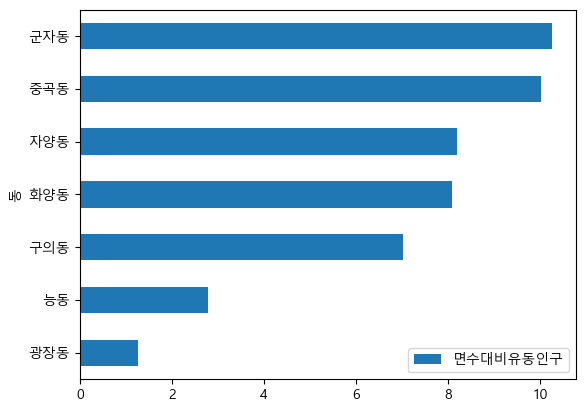

In [31]:
import matplotlib
df3[['면수대비유동인구']].sort_values('면수대비유동인구').plot.barh()

<AxesSubplot:ylabel='동'>

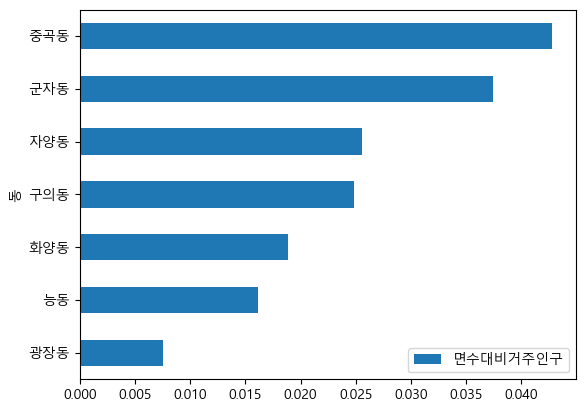

In [32]:
df3[['면수대비거주인구']].sort_values('면수대비거주인구').plot.barh()

<AxesSubplot:ylabel='동'>

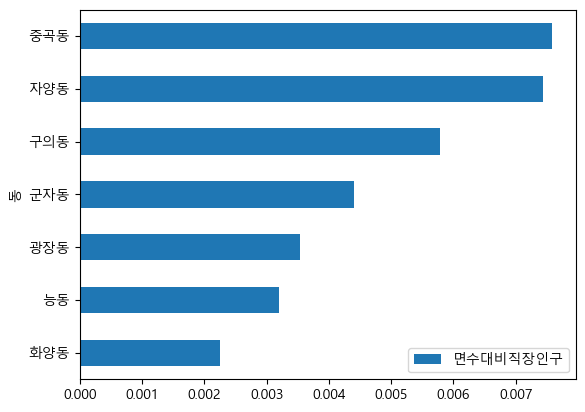

In [33]:
df3[['면수대비직장인구']].sort_values('면수대비직장인구').plot.barh()